In [ ]:
import numpy as np
import torch
import random

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
X_train = MNIST_train.train_data
X_test = MNIST_test.test_data
y_train = MNIST_train.train_labels
y_test = MNIST_test.test_labels


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [ ]:
X_train = X_train.float()
X_test = X_test.float()

In [ ]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [ ]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

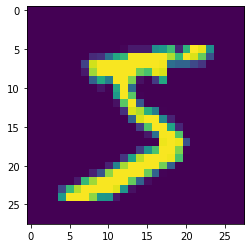

tensor(5)


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [ ]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [ ]:
class MNISTnet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(MNISTnet, self).__init__()
    self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
    self.ac1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)

  def forward(self, x):
    x = self.fc1(x)
    x = self.ac1(x)
    x = self.fc2(x)
    return x

mnist_net = MNISTnet(100)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr = 1.0e-3)

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
  
    for start_index in range(0, len(X_train), batch_size):
      optimizer.zero_grad()

      batch_indexes = order[start_index: start_index + batch_size]

      X_batch = X_train[batch_indexes].to(device)
      y_batch = y_train[batch_indexes].to(device)

      preds = mnist_net.forward(X_batch)
      
      loss_value = loss(preds, y_batch)
      loss_value.backward()

      optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

    print(accuracy) 

tensor(0.9088)
tensor(0.9141)
tensor(0.9204)
tensor(0.9240)
tensor(0.9261)
tensor(0.9232)
tensor(0.9301)
tensor(0.9310)
tensor(0.9295)
tensor(0.9315)
tensor(0.9283)
tensor(0.9284)
tensor(0.9341)
tensor(0.9320)
tensor(0.9342)
tensor(0.9392)
tensor(0.9390)
tensor(0.9383)
tensor(0.9377)
tensor(0.9353)
tensor(0.9411)
tensor(0.9390)
tensor(0.9377)
tensor(0.9345)
tensor(0.9375)
tensor(0.9414)
tensor(0.9417)
tensor(0.9417)
tensor(0.9427)
tensor(0.9455)
tensor(0.9416)
tensor(0.9459)
tensor(0.9437)
tensor(0.9453)
tensor(0.9424)
tensor(0.9438)
tensor(0.9428)
tensor(0.9460)
tensor(0.9446)
tensor(0.9479)
tensor(0.9487)
tensor(0.9481)
tensor(0.9464)
tensor(0.9430)
tensor(0.9466)
tensor(0.9514)
tensor(0.9494)
tensor(0.9522)
tensor(0.9485)
tensor(0.9495)
tensor(0.9507)
tensor(0.9529)
tensor(0.9475)
tensor(0.9505)
tensor(0.9544)
tensor(0.9543)
tensor(0.9542)
tensor(0.9509)
tensor(0.9532)
tensor(0.9528)
tensor(0.9524)
tensor(0.9493)
tensor(0.9548)
tensor(0.9555)
tensor(0.9537)
tensor(0.9571)
tensor(0.9

KeyboardInterrupt: ignored

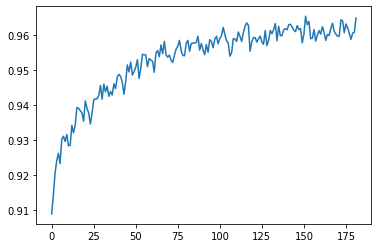

In [ ]:
plt.plot(test_accuracy_history)

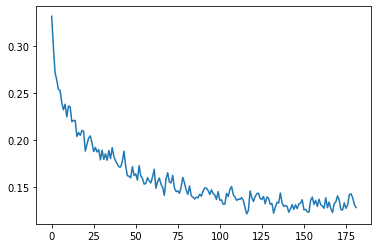

In [ ]:
plt.plot(test_loss_history)